In [54]:
from planaritychecker import PlanarityChecker
from numpy.random import random, randint
import networkx as nx
from planarity.planarity_networkx import planarity
%matplotlib inline

# Check $K_5$ and $K_{3,3}$ without one edge 

almost K5. number of edges: 9, is planar: 1


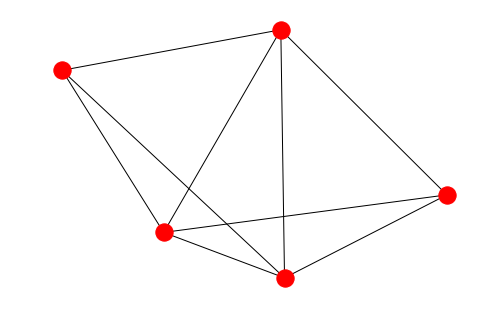

In [78]:
almost_K5 = PlanarityChecker(5)
graph_almost_K5 = nx.Graph()
graph_almost_K5.add_nodes_from(range(5))
for i in range(5):
    for j in range(i + 1, 5):
        if (i != 0 or j != 1):
            almost_K5.add_edge(i, j)
            graph_almost_K5.add_edge(i, j)
nx.draw(graph_almost_K5)
print("almost K5. number of edges: %d, is planar: %d" % (almost_K5.edges_count, almost_K5.is_planar()))

Almost K3,3. number of edges: 8, is planar: 1


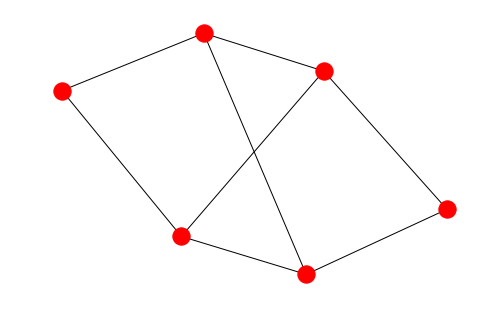

In [79]:
almost_K33 = PlanarityChecker(6)
graph_almost_K33 = nx.Graph()
graph_almost_K33.add_nodes_from(range(6))
for i in range(3):
    for j in range(3, 6):
        if i != 1 or j != 4:
            almost_K33.add_edge(i, j)
            graph_almost_K33.add_edge(i, j)
nx.draw(graph_almost_K33)
print("Almost K3,3. number of edges: %d, is planar: %d" % (almost_K33.edges_count, almost_K33.is_planar()))

# Check $K_5$ and $K_{3,3}$

K5. number of edges: 10, is planar: 0


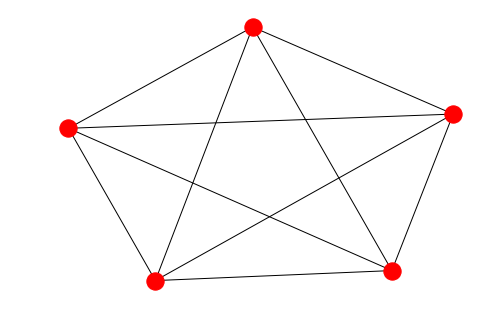

In [80]:
K5 = almost_K5
K5.add_edge(0, 1)
graph_K5 = graph_almost_K5
graph_K5.add_edge(0, 1)
nx.draw(graph_K5)
print("K5. number of edges: %d, is planar: %d" % (K5.edges_count, K5.is_planar()))

K33. number of edges: 9, is planar: 0


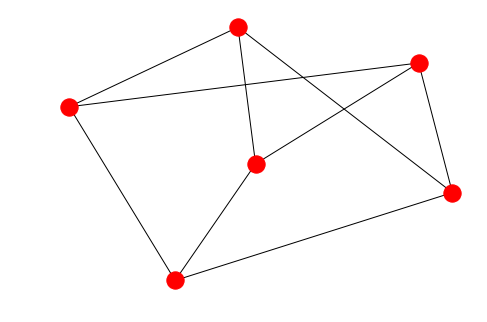

In [81]:
K33 = almost_K33
K33.add_edge(1, 4)
graph_K33 = graph_almost_K33
graph_K33.add_edge(1, 4)
nx.draw(graph_K33)
print("K33. number of edges: %d, is planar: %d" % (K33.edges_count, K33.is_planar()))

# Stress test
# Generate a lot of graphs with probability of every edge=$p$ and check planarity with PlanarityChecker and planarity library (https://pypi.org/project/planarity/)

In [83]:
def generate_graphs(n, p):
    """Generate Graph and nx.Graph with n vertexes, where p is a probability of edge existance"""
    G = PlanarityChecker(n)
    nx_G = nx.Graph() 
    nx_G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if random() < p:
                G.add_edge(i, j)
                nx_G.add_edge(i, j)
    return (G, nx_G)

n_planar, n_notplanar = 0, 0
for i in range(1000):
    G, nxG = generate_graphs(100, 0.02) 
    if G.is_planar() != planarity.is_planar(nxG):
        print("Custom: %d, Library: %d" % (G.is_planar(), planarity.is_planar(nxG)))
        nx.draw(nxG)
        break
    else:
        if (G.is_planar()):
            n_planar += 1
        else:
            n_notplanar += 1
print(n_planar, n_notplanar)

141 859


# It works correctly. Check execution time

In [84]:
n = 20000
m = 40000
G = PlanarityChecker(n)
edges = set()
for i in range(m):
    a = randint(0, n)
    b = randint(0, n)
    while (a, b) in edges or a == b:
        a = randint(0, n)
        b = randint(0, n)
    edges.add((a, b))
for e in edges:
    G.add_edge(e[0], e[1])

In [85]:
import sys
sys.setrecursionlimit(20000)

In [86]:
%%time
G.is_planar()

CPU times: user 382 ms, sys: 10.9 ms, total: 393 ms
Wall time: 391 ms


False

In [87]:
nx_G = nx.Graph()
nx_G.add_edges_from(edges)

In [88]:
%%time
planarity.is_planar(nx_G)

CPU times: user 82.8 ms, sys: 9.68 ms, total: 92.4 ms
Wall time: 89.6 ms


False

# Not bad for python. (planarity library has implementation on C)